<a href="https://colab.research.google.com/github/desaigeet96/DL_Assignments/blob/main/DL_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.datasets import cifar100

(X_train,y_train),(X_test,y_test)=cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

169009152/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
from keras.models import Sequential
from keras.layers import Dense


model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='softmax'),
tf.keras.layers.Dense(100)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          2

In [3]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.5165 - accuracy: 0.0268 - val_loss: 4.4809 - val_accuracy: 0.0308
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4189 - accuracy: 0.0320 - val_loss: 4.4142 - val_accuracy: 0.0302
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3821 - accuracy: 0.0311 - val_loss: 4.3411 - val_accuracy: 0.0363
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3457 - accuracy: 0.0343 - val_loss: 4.3830 - val_accuracy: 0.0338
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3235 - accuracy: 0.0361 - val_loss: 4.2942 - val_accuracy: 0.0401
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3307 - accuracy: 0.0358 - val_loss: 4.2843 - val_accuracy: 0.0386
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 4.3020 - accuracy: 0.0376 - val_loss: 4.2888 - val_accuracy:

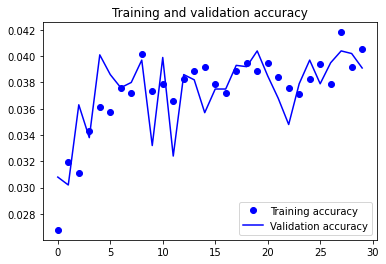

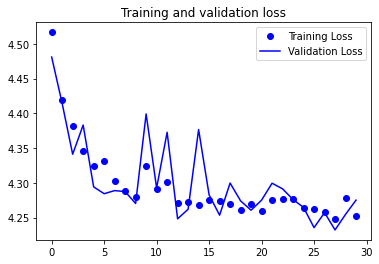

In [4]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Hyperparameter Tuning

In [5]:
from keras.models import Sequential                         
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, Adam, RMSprop

model_sgd = Sequential()
model_sgd.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model_sgd.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(MaxPooling2D((2,2)))
model_sgd.add(Dropout(0.1))
model_sgd.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(MaxPooling2D((2,2)))
model_sgd.add(Dropout(0.1))
model_sgd.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model_sgd.add(MaxPooling2D((2,2)))
model_sgd.add(Dropout(0.1))
model_sgd.add(Flatten())
model_sgd.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model_sgd.add(Dropout(0.1))
model_sgd.add(Dense(100,activation='softmax'))


opt = SGD(lr=0.001, momentum=0.9)
#model_sgd.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#initial_learning_rate=0.01
#lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,decay_steps=100000,decay_rate=0.96,staircase=True)
#tf.keras.optimizers.SGD(learning_rate=lr_schedule)
model_sgd.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history_sgd=model_sgd.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
782/782 [==============================] - 5s 6ms/step - loss: 4.6051 - accuracy: 0.0106 - val_loss: 4.6046 - val_accuracy: 0.0117
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 4.6032 - accuracy: 0.0118 - val_loss: 4.6021 - val_accuracy: 0.0111
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 4.6012 - accuracy: 0.0159 - val_loss: 4.6001 - val_accuracy: 0.0175
Epoch 4/100
782/782 [==============================] - 5s 6ms/step - loss: 4.5988 - accuracy: 0.0198 - val_loss: 4.5956 - val_accuracy: 0.0254
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 4.5954 - accuracy: 0.0251 - val_loss: 4.5905 - val_accuracy: 0.0344
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 4.5894 - accuracy: 0.0322 - val_loss: 4.5857 - val_accuracy: 0.0345
Epoch 7/100
782/782 [==============================] - 5s 6ms/step - loss: 4.5847 - accuracy: 0.0371 - val_loss: 4.5813 - val_accuracy: 0.0390

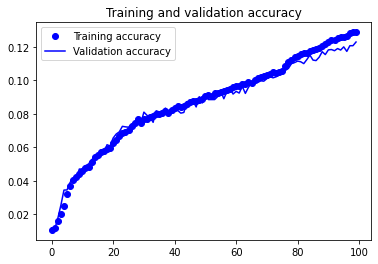

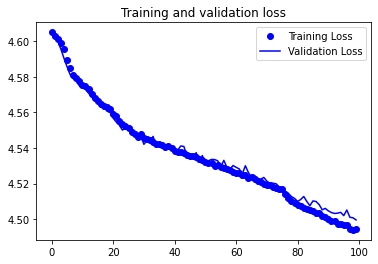

In [6]:
import matplotlib.pyplot as plt
acc = history_sgd.history['accuracy']
val_acc = history_sgd.history['val_accuracy']
loss = history_sgd.history['loss']
val_loss = history_sgd.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()